In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt

The Conversion Factor for Roll is 1.038


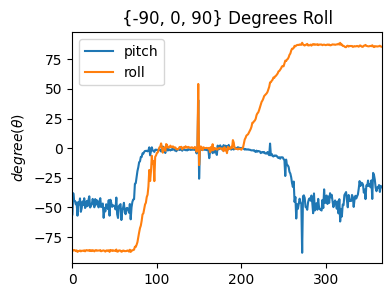

In [2]:
pitch = []
roll = []
readings = open('roll_a.txt', 'r').read().split('\n')
for reading in readings:
    pr = reading.split(',')
    pitch.append(float(pr[0]))
    roll.append(float(pr[1]))
cf_roll = 180/(np.mean(roll[270:]) - np.mean(roll[0:70]))
print(f"The Conversion Factor for Roll is {round(cf_roll,3)}")
plt.figure(figsize=(4, 3))
plt.plot(pitch, label = 'pitch')
plt.plot(roll, label = 'roll')
plt.ylabel(r'$degree(\theta)$')
plt.title('{-90, 0, 90} Degrees Roll')
plt.xlim([0,len(pitch)])
plt.legend();

The Conversion Factor for Pitch is 1.027


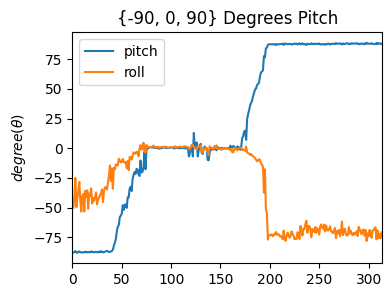

In [3]:
pitch = []
roll = []
readings = open('pitch_a.txt', 'r').read().split('\n')
for reading in readings:
    pr = reading.split(',')
    pitch.append(float(pr[0]))
    roll.append(float(pr[1]))
cf_pitch = 180/(np.mean(pitch[250:]) - np.mean(pitch[0:40]))
print(f"The Conversion Factor for Pitch is {round(cf_pitch,3)}")
plt.figure(figsize=(4, 3))
plt.plot(pitch, label = 'pitch')
plt.plot(roll, label = 'roll')
plt.ylabel(r'$degree(\theta)$')
plt.title('{-90, 0, 90} Degrees Pitch')
plt.xlim([0,len(pitch)])
plt.legend();

In [4]:
time = []
pitch = []
roll = []
readings = open('FFT.txt', 'r').read().split('\n')
for reading in readings:
    pr = reading.split(',')
    time.append(float(pr[0]))
    pitch.append(float(pr[1]))
    roll.append(float(pr[2]))
time = np.array(time)-time[0]
pitch = np.array(pitch)
roll = np.array(roll)

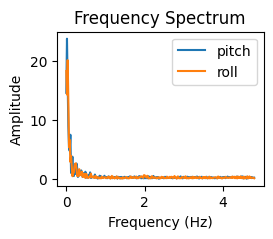

In [5]:
average_sample_interval = np.mean(np.diff(time))
sample_rate = 1 / (average_sample_interval / 1000)  # in seconds
pitch_fft = fft(pitch)
roll_fft = fft(roll)
freq = np.fft.fftfreq(len(pitch), average_sample_interval/1000)

plt.figure(figsize=(4/1.5, 2))
plt.plot(freq[:len(pitch)//2], np.abs(pitch_fft)[:len(pitch)//2] * 1 / len(pitch), label = "pitch") 
plt.plot(freq[:len(roll)//2], np.abs(roll_fft)[:len(roll)//2] * 1 / len(roll), label="roll") 
plt.legend()
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude');

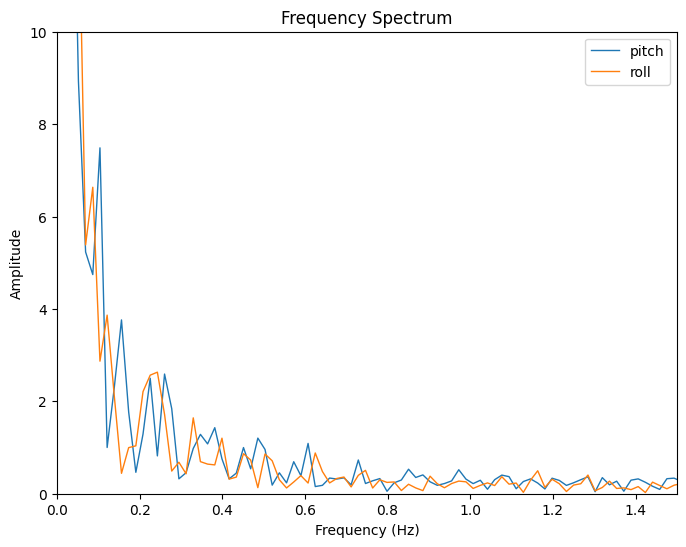

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(freq[:len(pitch)//2], np.abs(pitch_fft)[:len(pitch)//2] * 1 / len(pitch), label = "pitch", linewidth=1) 
plt.plot(freq[:len(roll)//2], np.abs(roll_fft)[:len(roll)//2] * 1 / len(roll), label="roll",linewidth=1) 
plt.legend()
plt.xlim([0,1.5])
plt.ylim([0,10])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude');

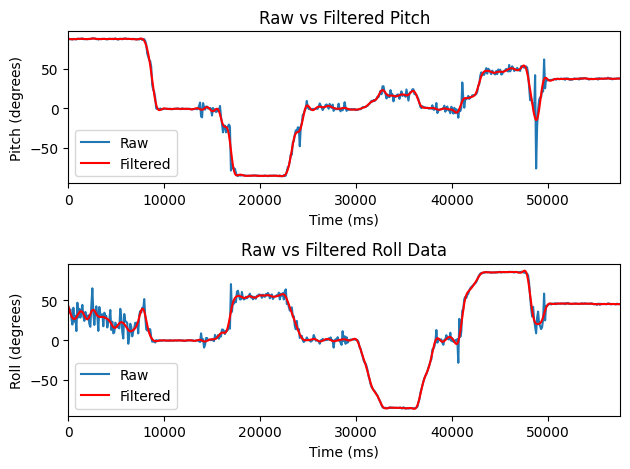

In [7]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

cutoff_frequency = 1  # in Hz

filtered_pitch = butter_lowpass_filter(pitch, cutoff_frequency, sample_rate)
filtered_roll = butter_lowpass_filter(roll, cutoff_frequency, sample_rate)

plt.subplot(2, 1, 1)
plt.plot(time, pitch, label='Raw')
plt.plot(time, filtered_pitch, label='Filtered', color='red')
plt.title('Raw vs Filtered Pitch')
plt.xlabel('Time (ms)')
plt.ylabel('Pitch (degrees)')
plt.xlim([0,57500])
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, roll, label='Raw')
plt.plot(time, filtered_roll, label='Filtered', color='red')
plt.title('Raw vs Filtered Roll Data')
plt.xlabel('Time (ms)')
plt.ylabel('Roll (degrees)')
plt.legend()
plt.xlim([0,57500])
plt.tight_layout()
plt.show();

The Conversion Factor for Pitch is 1.044
The Conversion Factor for Roll is 1.021


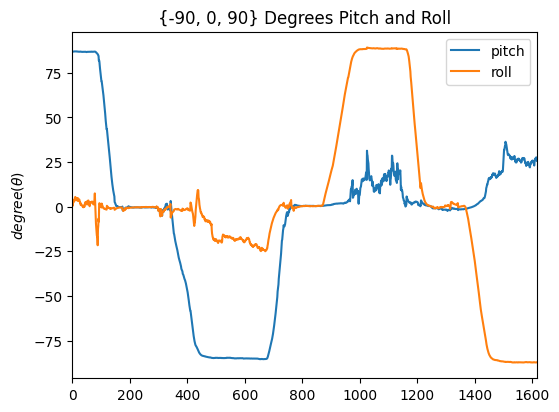

In [23]:
pitch = []
roll = []
readings = open('Comp.txt', 'r').read().split('\n')
for reading in readings:
    pr = reading.split(',')
    pitch.append(float(pr[6]))
    roll.append(float(pr[7]))
plt.figure(figsize=(6, 4.5))
plt.plot(pitch, label = 'pitch')
plt.plot(roll, label = 'roll')
plt.ylabel(r'$degree(\theta)$')
plt.title('{-90, 0, 90} Degrees Pitch and Roll')
plt.xlim([0,len(pitch)])
plt.legend();

cf_pitch = 180/(max(pitch)-min(pitch))
cf_roll = 180/(max(roll)-min(roll))
print(f"The Conversion Factor for Pitch is {round(cf_pitch,3)}")
print(f"The Conversion Factor for Roll is {round(cf_roll,3)}")